###### Melina Singh, Roll no. 28

#### This dataset consists of 60,000 coloured images of dimension 32x32 pixels divided into 10 classes. The classes contains aeroplane,bird, cat, automobile, ship, frog, truck, dog, deer and Horse. It is a cifar10 dataset

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

###### In this model I create five fully connected layers(self.fc1 to self.fc5) all are followed by activaton function Relu which applies an element-wise activation function that outputs the maximum of zero and the input value.

######  we put dropout to 0.25 and  four batch normalization layers (self.batchnorm1 to self.batchnorm4) to normalize the outputs of the linear layers.
###### Also The forward method defines the forward pass computation of the MLP model. In the forward pass, the input tensor x is first reshaped using x.view(x.size(0), -1) to flatten the input, which is assumed to have a shape of (16, 3, 32, 32) (3 channels, 32x32 image size). and 16 is output size of first linear layer.

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 64)
        self.fc4 = nn.Linear(64, 128)
        self.fc5 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.batchnorm1 = nn.BatchNorm1d(16)
        self.batchnorm2 = nn.BatchNorm1d(32)
        self.batchnorm3 = nn.BatchNorm1d(64)
        self.batchnorm4 = nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(0.25)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.batchnorm1(x)
        x = self.relu(self.fc2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.fc3(x))
        x = self.batchnorm3(x)
        x = self.relu(self.fc4(x))
        x = self.batchnorm4(x)
        x = self.dropout(x)
        x = self.fc5(x)
        x = self.softmax(x)
        return x

##### Data Preparation

###### The transforms.Compose function in PyTorch is used to chain multiple data transformations together. Each transformation is applied sequentially to the input data. In the given code snippet, the transforms.Compose function is used to create a composition of transformations to be applied to the input data.

###### transforms.ToTensor(): This transformation is used to convert the input image data into a PyTorch tensor. It converts a PIL Image or NumPy array into a tensor representation. This transformation also scales the pixel values from the range of 0-255 to 0-1.

###### transforms.Normalize(mean, std): This transformation is used to normalize the tensor by subtracting the mean and dividing by the standard deviation. In the given code, the mean and standard deviation values used are (0.5, 0.5, 0.5) and (0.5, 0.5, 0.5) respectively. These values represent the mean and standard deviation for each channel (RGB) in the image data. By applying this transformation, the pixel values in each channel are normalized to have a mean of 0.5 and a standard deviation of 0.5.

In [ ]:
# tranforming data to tensor and then downloading the cifar dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
data_path = '../data_cifar/'
cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print("Training: ", len(cifar10_train))
print("Testing: ", len(cifar10_test))

Training:  50000
Testing:  10000


In [ ]:
type(cifar10_train)

torchvision.datasets.cifar.CIFAR10

In [ ]:
type(cifar10_train[0])

tuple

In [ ]:
image, label = cifar10_train[0]
type(image)

torch.Tensor

In [ ]:
# displaying the classes and label n the dataset 
classes = cifar10_train.classes
print (classes)
print(label)
print(classes[label])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
6
frog


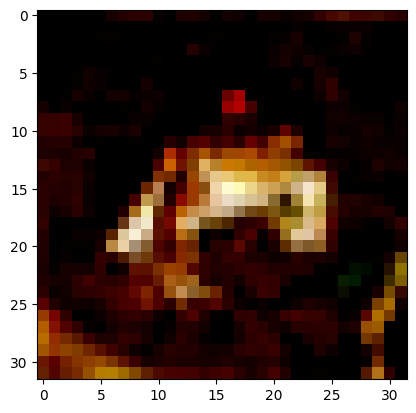

In [ ]:
plt.imshow(image.permute(1, 2, 0))

#### When working with the data of large parameters in neural network it makes sense to load training data in batches using the data loader class, since it helps with Memory Efficiency , Computational Efficiency, generalization and gradient efficiency and so on. So now I create a see so that my is always the same and if try to recreate this code we will get the same batches. here we put the batch size as 64 and since we are shuffling the data we also put its value as true.  
#### then for validation of the test data we create a test loader same as before and just set it to test but this time we provide with the same batch size.

In [ ]:
torch.manual_seed(42)
train_loader = DataLoader(cifar10_train, batch_size=64, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=64, shuffle=False)

In [ ]:
model = MLP()
model


MLP(
  (fc1): Linear(in_features=3072, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (softmax): Softmax(dim=1)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


In [ ]:
for param in model.parameters():
  print(param.numel())

49152
16
512
32
2048
64
8192
128
1280
10
16
16
32
32
64
64
128
128


In [ ]:
for images, labels in train_loader:
  break

In [ ]:
images.shape

torch.Size([64, 3, 32, 32])

###### So, images.view(-1, 3072).shape reshapes the images tensor to have a size of -1 in the first dimension (inferred based on the original tensor's shape) and 3072 elements in the second dimension

In [ ]:
images.view(-1, 3072).shape

torch.Size([64, 3072])

#### Model Training
###### in this code we import time so that we could find the time for executing the training process. we set epochs then initialize empty lists to store training and testing losses, as well as the number of correct predictions and started a loop for each epoch  Append the last loss and the number of correct predictions to the respective lists.
##### Use the torch.no_grad() context to disable gradient calculation for efficiency.Iterate over the batches of data in the testing data loader.Then perform a forward pass through the model to get predictions. Computed the number of correct predictions in the current batch.
###### Computed the loss between the last predictions and the last actual labels.Append the last loss to the testing losses list and the total number of correct predictions to the test_correct list.Calculated the total duration of the training process.
###### The code performs training and testing iterations for a given number of epochs using a neural network model.

In [ ]:
import time
start_time = time.time()

epochs = 10

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    for b_iter, (x_train, y_train) in enumerate(train_loader):
        b_iter += 1

        # Forward pass
        y_pred = model(x_train.view(x_train.size(0), -1))

        # Compute the loss
        loss = criterion(y_pred, y_train)

        # Compute the number of correct predictions in the current batch
        predicted = torch.argmax(y_pred, 1)
        batch_corr = (predicted == y_train).sum().item()
        trn_corr += batch_corr

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b_iter % 100 == 0:
            accuracy = trn_corr * 100 / (100 * b_iter)
            print(f'epoch: {i} batch {b_iter} loss: {loss.item()} accuracy: {accuracy}')

    train_losses.append(loss.item())
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b_iter, (x_test, y_test) in enumerate(test_loader):
            # Forward pass
            y_val = model(x_test.view(x_test.size(0), -1))

            # Compute the number of correct predictions in the current batch
            predicted = torch.argmax(y_val, 1)
            tst_corr += (predicted == y_test).sum().item()

    loss = criterion(y_val, y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr)

total_time = time.time() - start_time
print(f'Duration: {total_time / 60} mins')


epoch: 0 batch 100 loss: 2.1557273864746094 accuracy: 16.93
epoch: 0 batch 200 loss: 2.184732437133789 accuracy: 19.19
epoch: 0 batch 300 loss: 1.9875943660736084 accuracy: 20.15
epoch: 0 batch 400 loss: 2.143026828765869 accuracy: 20.6525
epoch: 0 batch 500 loss: 2.071582078933716 accuracy: 21.256
epoch: 0 batch 600 loss: 2.1150097846984863 accuracy: 21.601666666666667
epoch: 0 batch 700 loss: 2.0770318508148193 accuracy: 21.928571428571427
epoch: 1 batch 100 loss: 2.1486291885375977 accuracy: 24.74
epoch: 1 batch 200 loss: 2.0783298015594482 accuracy: 25.04
epoch: 1 batch 300 loss: 2.129096746444702 accuracy: 25.14666666666667
epoch: 1 batch 400 loss: 2.0557940006256104 accuracy: 25.2075
epoch: 1 batch 500 loss: 2.1724658012390137 accuracy: 25.048
epoch: 1 batch 600 loss: 2.03570294380188 accuracy: 24.961666666666666
epoch: 1 batch 700 loss: 2.110022783279419 accuracy: 24.992857142857144
epoch: 2 batch 100 loss: 2.0375165939331055 accuracy: 25.99
epoch: 2 batch 200 loss: 1.9638539552

###### Plotting the Accuracy and Loss Curves

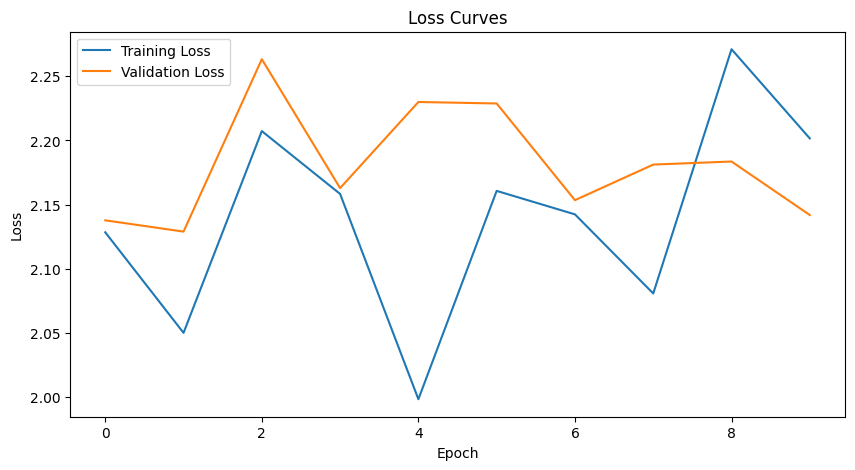

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

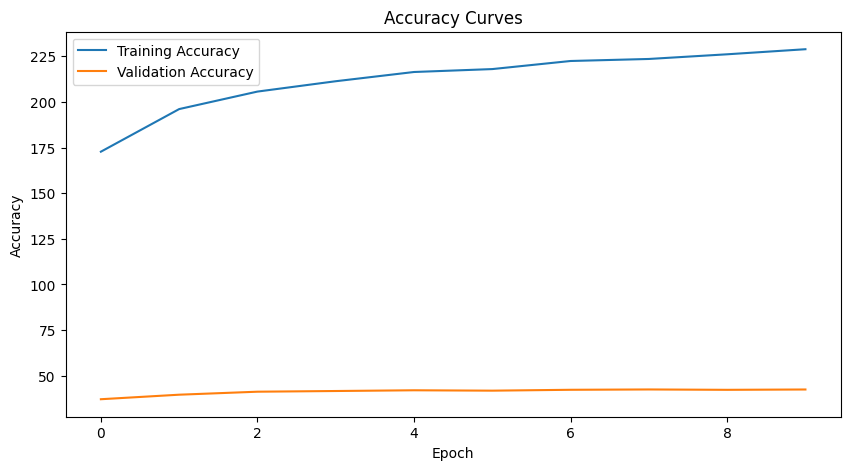

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.show()

#### Creating a Confusion MAtrix

In [ ]:
test_load_all = DataLoader(cifar10_test, batch_size=10000, shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_all: 
    y_val = model(X_test.view(len(X_test),-1))
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

In [ ]:
100*correct.item()/len(cifar10_test)

43.75

In [ ]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[546,  61, 103,  36,  67,  26,   6,  45, 177,  74],
       [ 44, 552,  50,  47,  20,  52,  22,  39,  86, 185],
       [ 75,  30, 323, 112, 166, 118,  79, 104,  20,  17],
       [ 32,  48,  79, 283,  61, 194,  72,  83,  32,  45],
       [ 19,  17, 121,  42, 352,  59, 118,  77,  13,  10],
       [ 20,  16,  49, 133,  43, 277,  38,  60,  26,  15],
       [ 26,  35, 168, 212, 175, 131, 590,  65,  17,  44],
       [ 50,  34,  58,  46,  76,  84,  40, 441,  23,  48],
       [112,  56,  27,  37,  23,  27,  14,  11, 502,  53],
       [ 76, 151,  22,  52,  17,  32,  21,  75, 104, 509]])

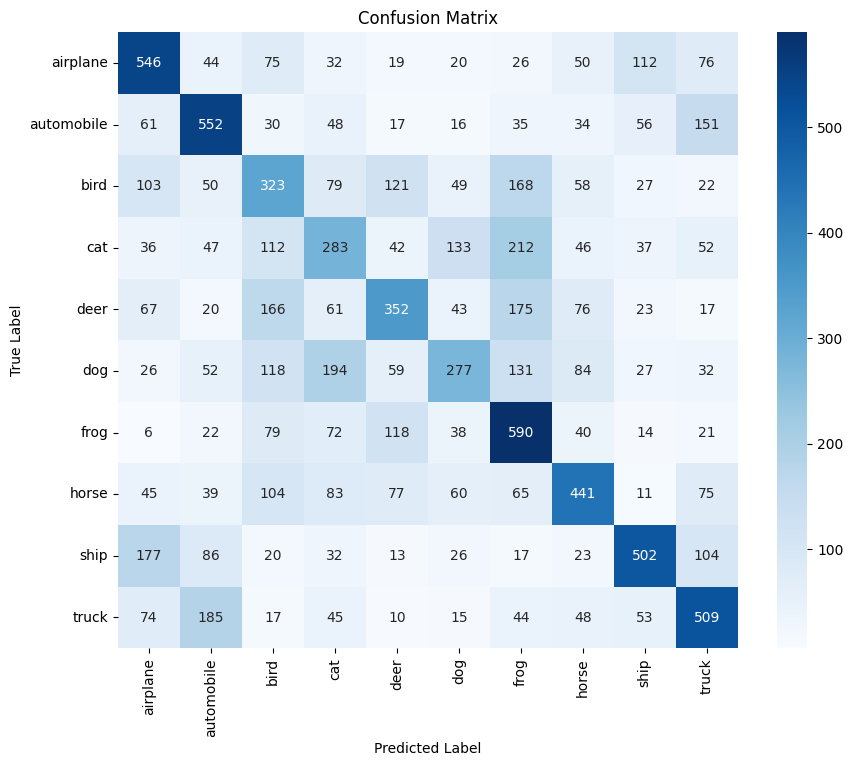

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Performing test predictions
model.eval()
test_predictions = []

with torch.no_grad():
    for images, _ in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_predictions.extend(predicted.tolist())

# Now Display some test predictions
print("Test Predictions:")
for i in range(10):
    print(f"Image {i+1}: {class_names[test_predictions[i]]}")


Test Predictions:
Image 1: automobile
Image 2: truck
Image 3: ship
Image 4: airplane
Image 5: deer
Image 6: frog
Image 7: cat
Image 8: frog
Image 9: bird
Image 10: automobile


#### Result of the prediction

In [ ]:
images, labels = next(iter(test_load_all))
 
with torch.no_grad():
  images, labels = images, labels
  preds = model(X_test.view(len(X_test),-1))
 
images_np = [i.mean(dim=0).cpu().numpy() for i in images]
class_names = cifar10_test.classes

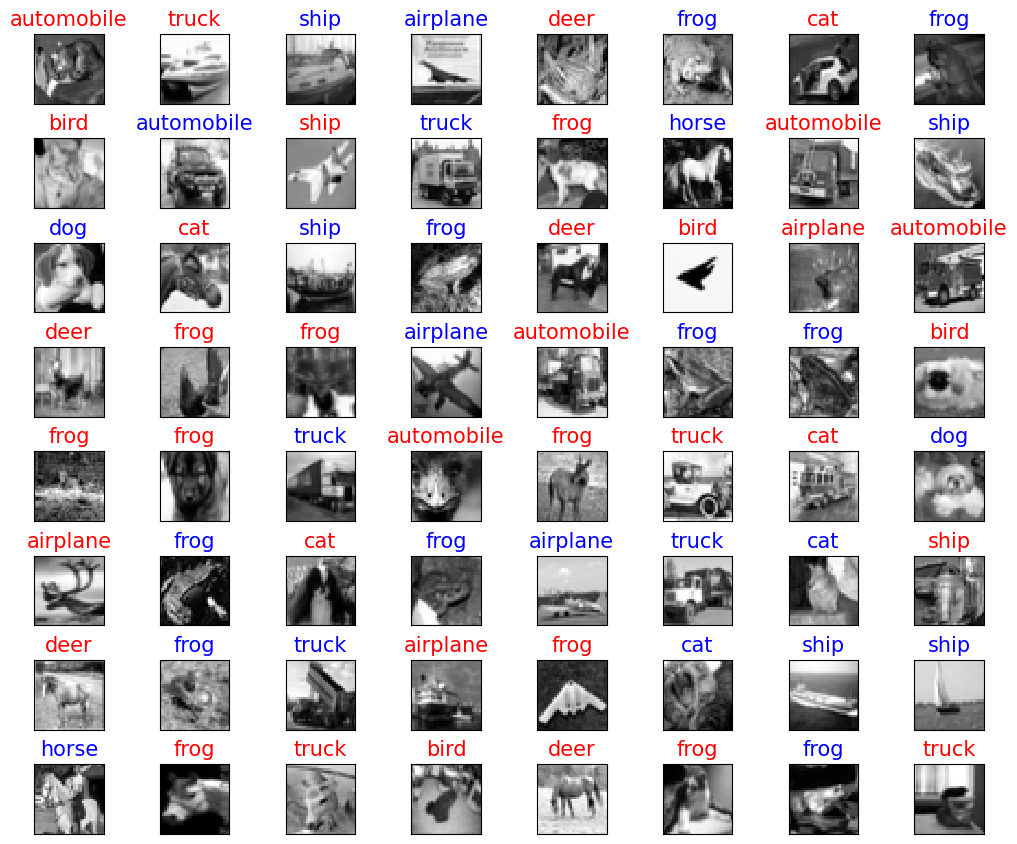

In [ ]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)
 
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(images_np[i], cmap='gray', interpolation='nearest')
    color = "blue" if labels[i] == torch.max(preds[i], 0)[1] else "red"
    plt.title(class_names[torch.max(preds[i], 0)[1]], color=color, fontsize=15)